# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
pd.set_option('display.max_seq_items', 40)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 40)
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### 데이터 셋 읽어오기

In [2]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,NaN,purchasing,62,Quotation or purchase consultation,multi-split,NaN,NaN,/Quezon City/Philippines,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,NaN,media and communication,96,Quotation or purchase consultation,multi-split,NaN,NaN,/PH-00/Philippines,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,NaN,engineering,56,Product Information,single-split,NaN,NaN,/Kolkata /India,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,NaN,entrepreneurship,44,Quotation or purchase consultation,vrf,NaN,NaN,/Bhubaneswar/India,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,NaN,consulting,97,Quotation or purchase consultation,multi-split,NaN,NaN,/Hyderabad/India,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [5]:
df_train.isna().sum()

bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate       44731
customer_idx                   0
customer_type              43961
enterprise                     0
historical_existing_cnt    45543
id_strategic_ver           55855
it_strategic_ver           58178
idit_strategic_ver         54734
customer_job               18733
lead_desc_length               0
inquiry_type                 941
product_category           19374
product_subcategory        50064
product_modelname          50070
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline          30863
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area              40882
business_subarea           53773
lead_owner                     0
is_converted                   0
dtype: int64

In [6]:
print('ver_pro_1이면서 전환 False 비율:', 2735/54449 *100)
print('ver_pro_1이면서 전환 True 비율:', 278/4850*100)

ver_pro_1이면서 전환 False 비율: 5.023049091810685
ver_pro_1이면서 전환 True 비율: 5.731958762886598


In [7]:
major_business_area = ['retail', 'corporate / office', 'education','hotel & accommodation']
major_product_categroy = ['led signage', 'video wall signage', 'high brightness signage',
       'standard signage', 'oled signage', 'interactive signage',
       'hotel tv', 'special signage']

In [8]:
df_train = df_train.drop(["customer_country",
                          "customer_country.1",
                          'id_strategic_ver',
                          'it_strategic_ver',
                          'idit_strategic_ver',
                          'product_subcategory',
                          'product_modelname',
                          'business_subarea'
], axis=1)

df_test = df_test.drop(["customer_country",
                        "customer_country.1",
                        'id_strategic_ver',
                        'it_strategic_ver',
                        'idit_strategic_ver',
                        'product_subcategory',
                        'product_modelname',
                        'business_subarea'
], axis=1)

## 2. 데이터 전처리

### 레이블 인코딩

In [9]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [10]:
# 레이블 인코딩할 칼럼들
label_columns = [
    #"customer_country",
    #"business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    #"product_subcategory",
    #"product_modelname",
    #"customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

다시 학습 데이터와 제출 데이터를 분리합니다.

In [11]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

### 2-2. 학습, 검증 데이터 분리

In [12]:
# ! pip install imbalanced-learn

In [13]:
from imblearn.under_sampling import RandomUnderSampler

# Random Undersampling 적용
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(df_train.drop("is_converted", axis=1),df_train["is_converted"])

In [14]:
x_train, x_val, y_train, y_val = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

### 모델 정의 

In [15]:
# model = DecisionTreeClassifier() # undersampling-> 0.53 : 0.85

from sklearn.ensemble import RandomForestClassifier # 0.63 : 0.91
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# model = RandomForestClassifier(random_state = 42)
model = XGBClassifier(random_state = 42)

### 모델 학습

In [16]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 모델 성능 보기

In [17]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [18]:
pred = model.predict(x_val)
get_clf_eval(y_val, pred)

오차행렬:
 [[906  60]
 [ 79 895]]

정확도: 0.9284
정밀도: 0.9198
재현율: 0.9379
F1: 0.9288


## feature importance 확인

In [19]:
df_train.columns

Index(['bant_submit', 'business_unit', 'com_reg_ver_win_rate', 'customer_idx',
       'customer_type', 'enterprise', 'historical_existing_cnt',
       'customer_job', 'lead_desc_length', 'inquiry_type', 'product_category',
       'customer_position', 'response_corporate', 'expected_timeline',
       'ver_cus', 'ver_pro', 'ver_win_rate_x', 'ver_win_ratio_per_bu',
       'business_area', 'lead_owner', 'is_converted'],
      dtype='object')

In [20]:
model.feature_importances_

array([0.02897255, 0.07472926, 0.05871446, 0.1719928 , 0.2337703 ,
       0.02405661, 0.0323418 , 0.01948621, 0.0201952 , 0.0407576 ,
       0.02465446, 0.0176515 , 0.05244011, 0.01891404, 0.02546309,
       0.01562705, 0.02775258, 0.02476418, 0.01991797, 0.0677982 ],
      dtype=float32)

In [21]:
df_train.head()

,bant_submit,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,customer_job,lead_desc_length,inquiry_type,product_category,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,lead_owner,is_converted
0,1.0,0,0.066667,32160,10,0,NaN,420,62,32,180,47,33,246,1,0,0.003079,0.026846,0,0,True
1,1.0,0,0.066667,23122,10,0,12.0,303,96,32,180,21,33,246,1,0,0.003079,0.026846,0,1,True
2,1.0,0,0.088889,1755,10,0,144.0,160,56,27,238,80,21,246,1,0,0.003079,0.026846,0,2,True
3,1.0,0,0.088889,4919,10,0,NaN,166,44,32,318,21,21,246,1,0,0.003079,0.026846,0,3,True
4,1.0,0,0.088889,17126,29,0,NaN,84,97,32,180,80,21,246,0,0,0.003079,0.026846,0,4,True


In [22]:
from xgboost import plot_importance

fscore = model.get_booster().get_fscore()
fscore

{'bant_submit': 78.0,
 'business_unit': 50.0,
 'com_reg_ver_win_rate': 182.0,
 'customer_idx': 498.0,
 'customer_type': 167.0,
 'enterprise': 59.0,
 'historical_existing_cnt': 99.0,
 'customer_job': 181.0,
 'lead_desc_length': 348.0,
 'inquiry_type': 98.0,
 'product_category': 179.0,
 'customer_position': 152.0,
 'response_corporate': 276.0,
 'expected_timeline': 65.0,
 'ver_cus': 6.0,
 'ver_pro': 16.0,
 'ver_win_rate_x': 83.0,
 'ver_win_ratio_per_bu': 68.0,
 'business_area': 35.0,
 'lead_owner': 608.0}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

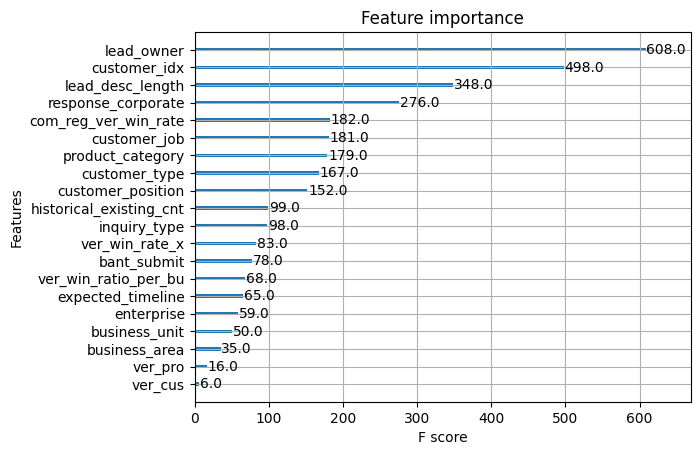

In [23]:
plot_importance(model)

## 4. 제출하기

### 테스트 데이터 예측

In [24]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)

In [25]:
test_pred = model.predict(x_test)
sum(test_pred) # True로 예측된 개수

1923

### 제출 파일 작성

In [26]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**

In [27]:
import pandas as pd

# 예시 데이터 생성
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, None],
        'C': ['a', 'b', None, 'd', 'e']}
df = pd.DataFrame(data)

# 결측치를 플래그로 처리하는 함수 정의
def flag_missing_values(df):
    flagged_df = df.copy()
    for col in df.columns:
        flagged_df[col + '_missing_flag'] = df[col].isnull().astype(int)  # 결측치인 경우 1, 아닌 경우 0으로 플래그 지정
    return flagged_df

# 결측치를 플래그로 처리한 데이터프레임 생성
flagged_df = flag_missing_values(df)

print("Original DataFrame:")
print(df)
print("\nDataFrame with Missing Value Flags:")
print(flagged_df)

Original DataFrame:
     A    B     C
0  1.0  NaN     a
1  2.0  2.0     b
2  NaN  3.0  None
3  4.0  4.0     d
4  5.0  NaN     e

DataFrame with Missing Value Flags:
     A    B     C  A_missing_flag  B_missing_flag  C_missing_flag
0  1.0  NaN     a               0               1               0
1  2.0  2.0     b               0               0               0
2  NaN  3.0  None               1               0               1
3  4.0  4.0     d               0               0               0
4  5.0  NaN     e               0               1               0
